In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/Users/amorav/Library/Mobile Documents/com~apple~CloudDocs/DS_projects/car_value_estimator/data/ads_all.csv')

In [4]:
data.head()

,id,ad_id,link,num_of_pic,price,brand,model,title,year,km,steering_side,region_specs,location,tags
0,1,2b245180a2df401d91d205226a6f5889/,https://uae.dubizzle.com/motors/used-cars/ford...,17.0,"159,000",Ford,F-Series Pickup,SVT Raptor 2018 F150 under service contract Fe...,2018.0,"107,000 km",Left Hand,GCC Specs,"Sheikh Zayed Road, Dubai",NaN
1,2,c688c6c29231491796a683f7a4126006/,https://uae.dubizzle.com/motors/used-cars/ford...,18.0,"276,000",Ford,Mustang,"Ford Mustang Shelby, original, American import...",2021.0,"2,000 km",Left Hand,American Specs,Saif Zone (Sharjah International Airport Free ...,NaN
2,3,20e7537262574ffaa63989e950542f32/,https://uae.dubizzle.com/motors/used-cars/ford...,19.0,"62,500",Ford,Edge,"Black Package â€¢ 1,295x48PM â€¢ 2016 Ford Edg...",2016.0,"79,000 km",Left Hand,GCC Specs,"Al Quoz, Dubai",NaN
3,4,d4d0bd4fb6cb40a6b2f8edfd577dbc7f/,https://uae.dubizzle.com/motors/used-cars/ford...,19.0,"169,000",Ford,Mustang,"FORD WARRANTY â€¢ 2,660x60PM â€¢ 2020 Ford Mus...",2020.0,"55,000 km",Left Hand,GCC Specs,"Al Quoz, Dubai",NaN
4,5,0e70caa1d9f446a79ea846ecc8add920/,https://uae.dubizzle.com/motors/used-cars/ford...,19.0,"209,000",Ford,Mustang,"Ford Warranty â€¢ 3,290x60PM â€¢ 2023 Ford Mus...",2023.0,"29,000 km",Left Hand,GCC Specs,"Al Quoz, Dubai",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21122 entries, 0 to 21121
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21122 non-null  int64  
 1   ad_id          21122 non-null  object 
 2   link           21122 non-null  object 
 3   num_of_pic     20872 non-null  float64
 4   price          20876 non-null  object 
 5   brand          20876 non-null  object 
 6   model          20876 non-null  object 
 7   title          20871 non-null  object 
 8   year           20872 non-null  float64
 9   km             20872 non-null  object 
 10  steering_side  20872 non-null  object 
 11  region_specs   20872 non-null  object 
 12  location       20872 non-null  object 
 13  tags           4522 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.3+ MB


In [6]:
#remove unneccessary columns and NaN
data.drop(columns=['id', 'ad_id', 'link', 'num_of_pic'], inplace=True)
data.dropna(how='all', inplace=True)

In [12]:
import numpy as np
np.sort(data.model.unique())

array(['1-Series', '190', '2-Series', '240/260/280', '3-Series', '300ZX',
       '350Z', '370z', '4-Series', '400/420', '400Z', '450 SEL',
       '4Runner', '5-Series', '6-Series', '7-Series', '8-Series', '86',
       'A-Class', 'A1', 'A200', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'AMG',
       'Accent', 'Accord', 'Alphard', 'Altima', 'Apache', 'Armada',
       'Arteon', 'Aurion', 'Avalanche', 'Avalon', 'Avanti', 'Avanza',
       'Aveo', 'Azera', 'B-Class', 'Beetle', 'Blazer', 'Bongo', 'Bora',
       'Bronco', 'C-Class', 'C-Class Coupe', 'C-HR', 'C43', 'CC',
       'CL-Class', 'CLA', 'CLC', 'CLE-Class', 'CLK-Class', 'CLS 450',
       'CLS-Class', 'CR-V', 'CT-Series', 'Caddy', 'Cadenza', 'Camaro',
       'Camry', 'Caprice', 'Captiva', 'Carens', 'Carnival', 'Celica',
       'Centennial', 'Cerato', 'Chevelle', 'City', 'Civic', 'Coaster',
       'Colorado', 'Corolla', 'Corolla Cross', 'Corvette', 'Coupe',
       'Crafter', 'Cressida', 'Creta', 'Crosstour', 'Crown',
       'Crown Victoria', 'C

In [13]:
# Prepare features of dataset for analysis
# transform price to numeric
data['price']=data['price'].apply(lambda x: float(str(x).replace(',', '')))

# Remove 'km' string and convert to numeric
data['km'] = data['km'].str.replace(' km', '').str.replace(',', '').astype(float)

# Feature Engineering
# Extract car age
current_year = 2024
data['car_age'] = current_year - data['year']

In [14]:
print('Examine ad description to understand if we can get addidtional features')
data.title[:20].values

Examine ad description to understand if we can get addidtional features


array(['SVT Raptor 2018 F150 under service contract Feb 2026',
       'Ford Mustang Shelby, original, American import, only 2000 km, 2 year warranty',
       'Black Package â€¢ 1,295x48PM â€¢ 2016 Ford Edge EcoBoost SE 2.0 250bhp â€¢ Full Service History Ford',
       'FORD WARRANTY â€¢ 2,660x60PM â€¢ 2020 Ford Mustang GT V8 450 BHP â€¢ Ford Service History â€¢ GCC',
       'Ford Warranty â€¢ 3,290x60PM â€¢ 2023 Ford Mustang GT V8 450 BHP â€¢ Ford Service Contract â€¢ GCC',
       'GCC / 2018 / HATCHBACK + BLUETOOTH SYSTEM + POWER LOCKS + / UNLIMITED MILEAGE WARRANTY',
       'GCC / 2017 / SEDAN + NAVIGATION + CAMERA + BLUETOOTH SYSTEM + POWER LOCKS / UNLIMITED KMS WARRANTY',
       'RECOVERY + FULL DOWN PLATFORM FROM P.M / 2018 / GCC / F550 / AUTOMATIC GEAR-BOX + DIESEL + 3 SEATERS',
       'DIGITAL CLUSTER/RECARO SEATS/ACTIVE EXHAUST/FULL OPTION',
       'AED3221/month | 2021 Ford F 150 3.5L | Warranty | Service | GCC Specifications | Ref#137079',
       'AED 1,651 PM â€¢ TERRITORY â

One feature that can be extracted is 'Warranty', let's get it

In [15]:

data['title']=data['title'].str.lower()
data['warranty']=data['title'].apply(lambda x: 'warranty' in str(x))

Now let's analyse the target feature of this dataset and find outliers

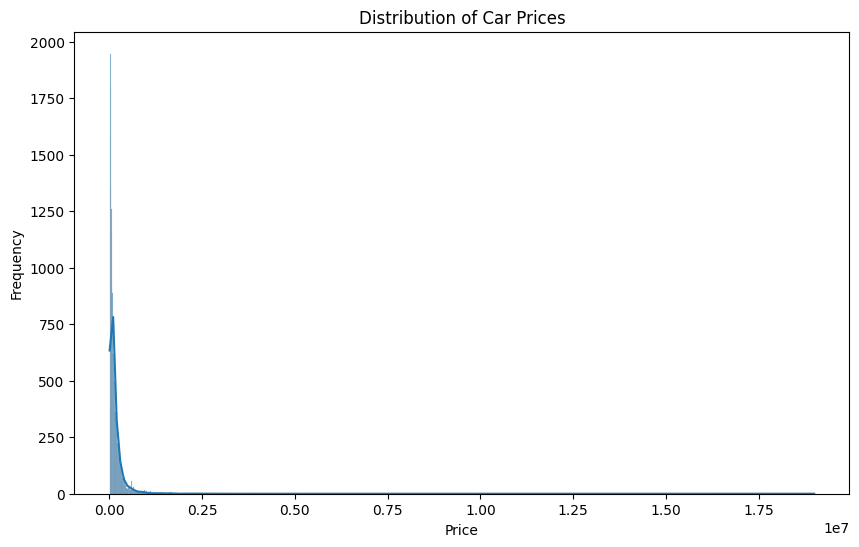

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
#Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

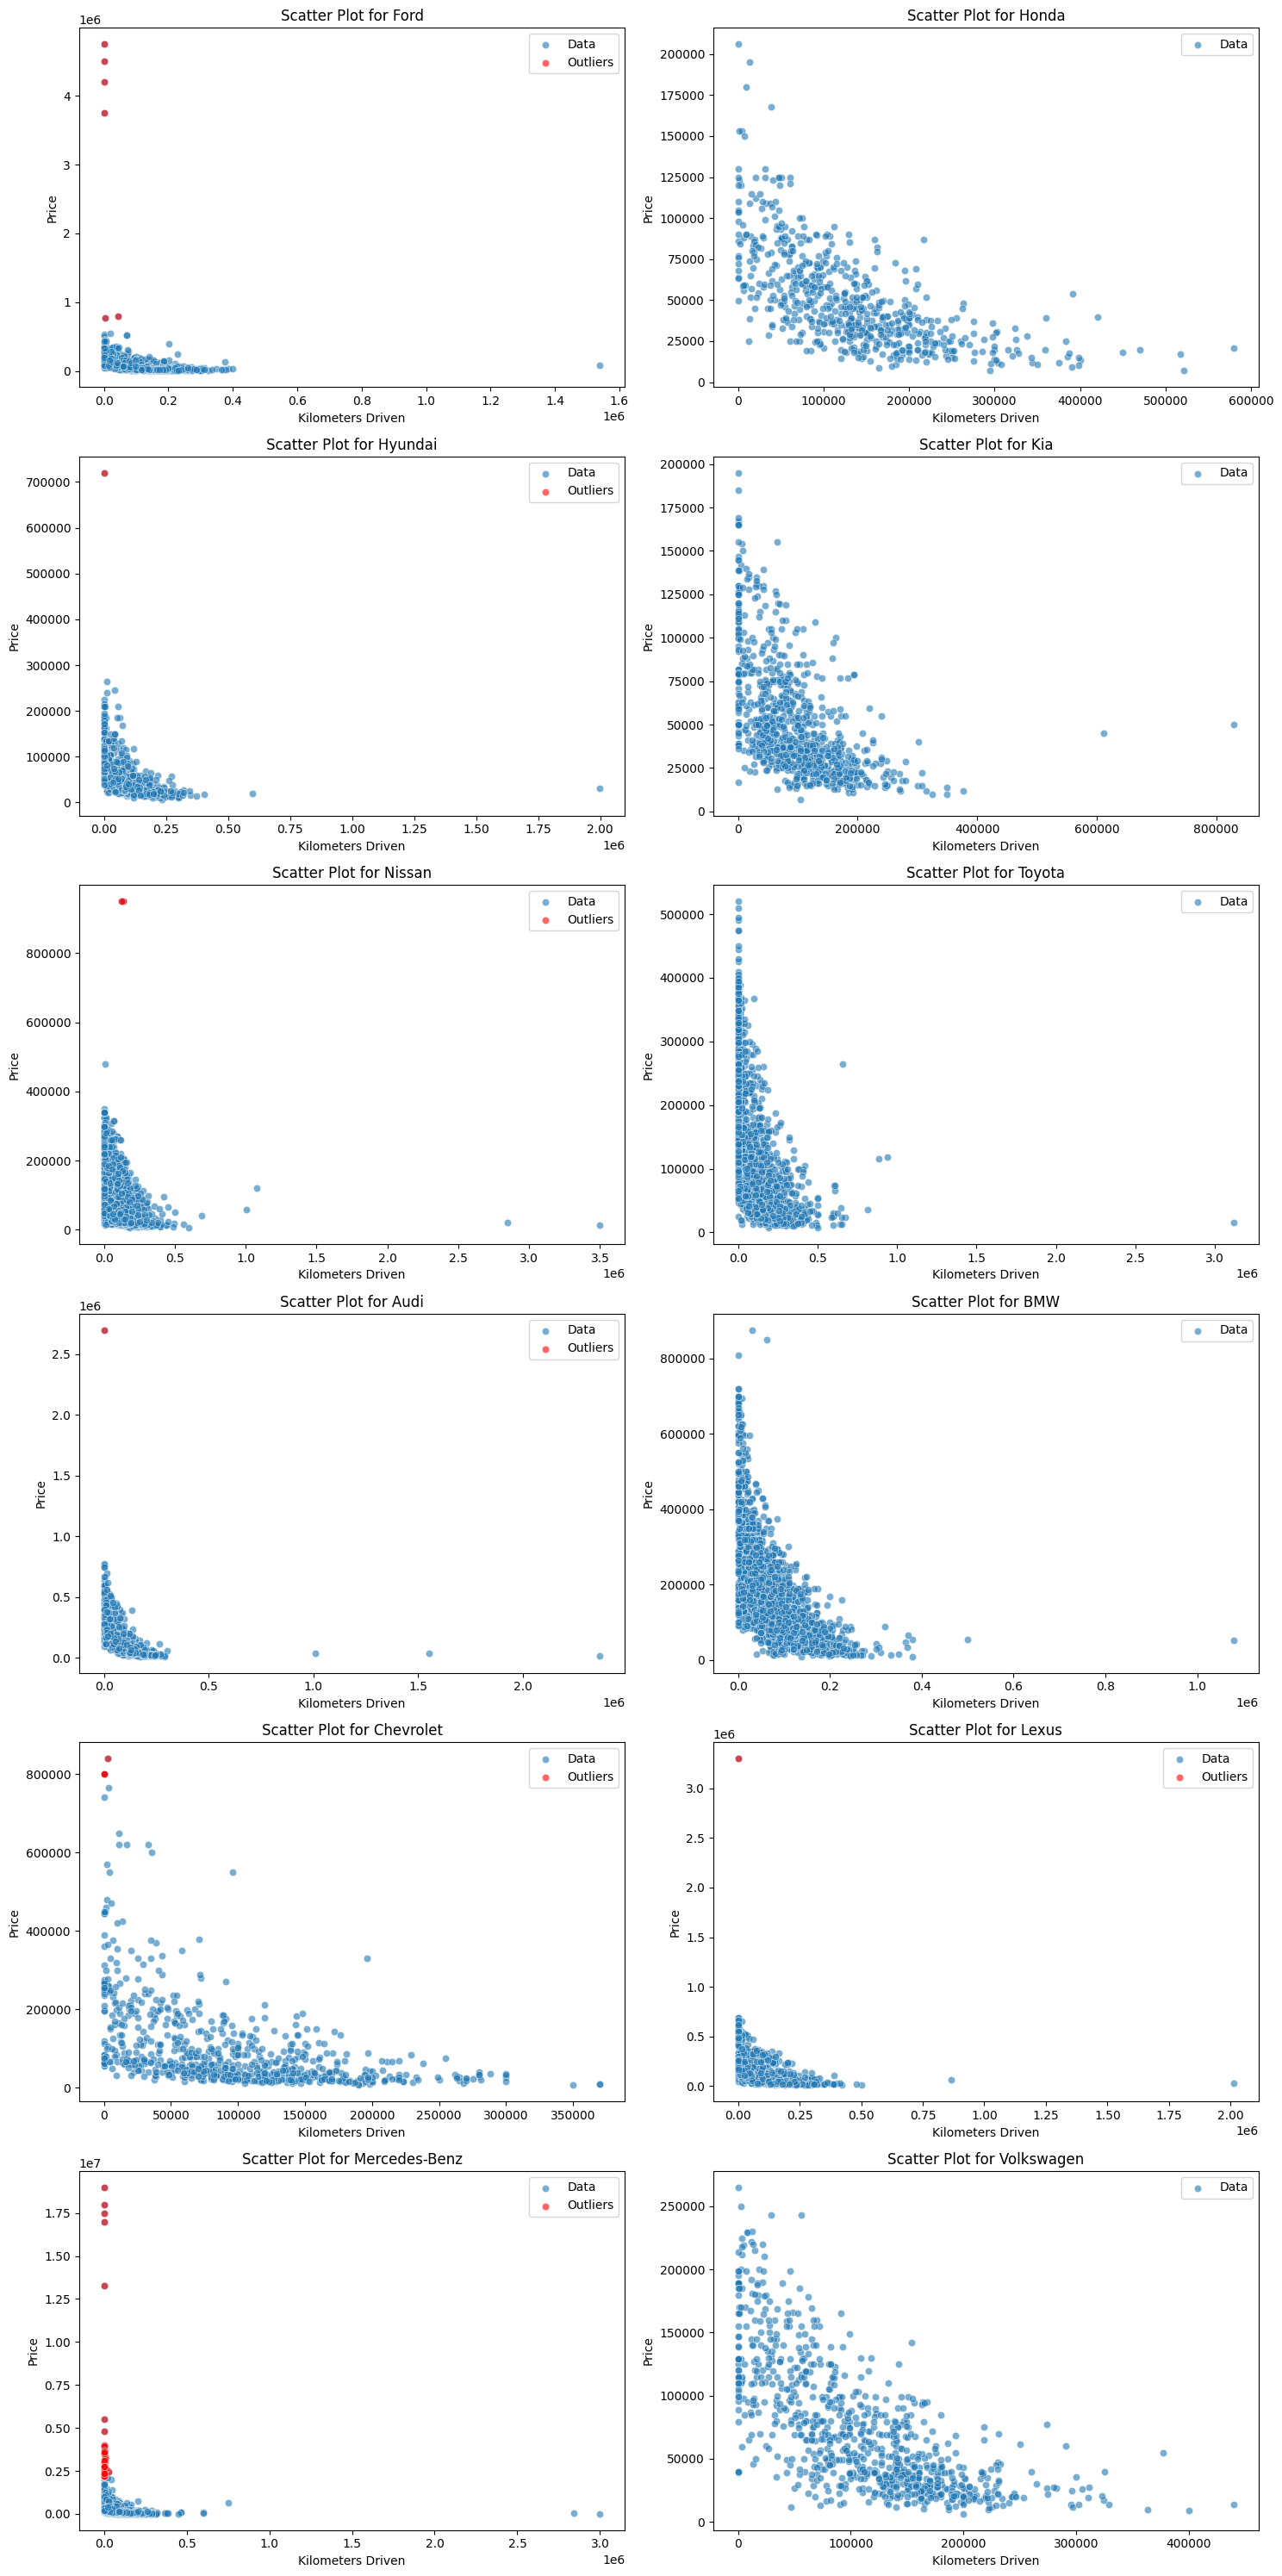

Detected 49 ads that are outliers


,price,brand,model,title,year,km,steering_side,region_specs,location,tags,car_age,warranty
36,4499999.0,Ford,GT,2022 ford gt studio collection | 1 of 20 | fm-...,2022.0,0.0,Left Hand,European Specs,"Al Quoz, Dubai",NaN,2.0,False
202,799999.0,Ford,Mustang,1968 ford muêœ±tang êœ±helby | gt350 faêœ±tbac...,1968.0,43209.0,Left Hand,American Specs,"Al Quoz, Dubai",FEATURED,56.0,False
227,4750000.0,Ford,GT,gcc i ford gt i heritage edition i brand new,2019.0,60.0,Left Hand,GCC Specs,"Al Quoz, Dubai",FEATURED,5.0,False
249,4200000.0,Ford,GT,ford gt liquid carbon 1 of 25 + full carbon bo...,2022.0,30.0,Left Hand,European Specs,"Deira, Dubai",FEATURED,2.0,False
460,3750000.0,Ford,GT,ford gt heritage edition limited,2022.0,30.0,Left Hand,European Specs,"Deira, Dubai",NaN,2.0,False
1239,769000.0,Ford,Mustang,1968 ford mustang eleanor gt500 tribute editio...,1968.0,3000.0,Left Hand,American Specs,"Al Quoz, Dubai",NaN,56.0,False
1999,720000.0,Hyundai,Genesis,2024 hyundai genesis gv80 twilight edition ( 1...,2024.0,50.0,Left Hand,GCC Specs,"Sheikh Zayed Road, Dubai",FEATURED,0.0,True
4268,949999.0,Nissan,GT-R,1999 nissan gt-r r 34 series 1 | fm-inv.fc -1031,1999.0,137492.0,Left Hand,Japanese Specs,"Al Quoz, Dubai",FEATURED,25.0,False
4269,949999.0,Nissan,GT-R,1999 nissan skyline gt-r 34 series 1 | fm-inv....,1999.0,121460.0,Left Hand,Japanese Specs,"Dubai Marina, Dubai",FEATURED,25.0,False
10552,2700000.0,Audi,S8,audi a8 long security vr9 werkspanzer/guard ne...,2024.0,50.0,Left Hand,European Specs,"Deira, Dubai",NaN,0.0,False


In [17]:
import numpy as np

# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Get unique brands
brands = data['brand'].unique()

# Create scatter plots with outliers highlighted for each brand
n_rows = (len(brands) + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

outliers_df=[]
for i, brand in enumerate(brands):
    ax = axes[i // 2, i % 2]
    brand_data = data[data['brand'] == brand]
    outliers = detect_outliers(brand_data, 'price')
    outliers_df.append(outliers)
    sns.scatterplot(x='km', y='price', data=brand_data, ax=ax, label='Data', alpha=0.6)
    sns.scatterplot(x='km', y='price', data=outliers, ax=ax, label='Outliers', color='red', alpha=0.6)
    
    ax.set_title(f'Scatter Plot for {brand}')
    ax.set_xlabel('Kilometers Driven')
    ax.set_ylabel('Price')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

outliers_df=pd.concat(outliers_df)
print(f'Detected {len(outliers_df)} ads that are outliers')
outliers_df

In [18]:
#Remove outliers and review the Prices per brand again
data_cleaned=data.drop(index=outliers_df.index)

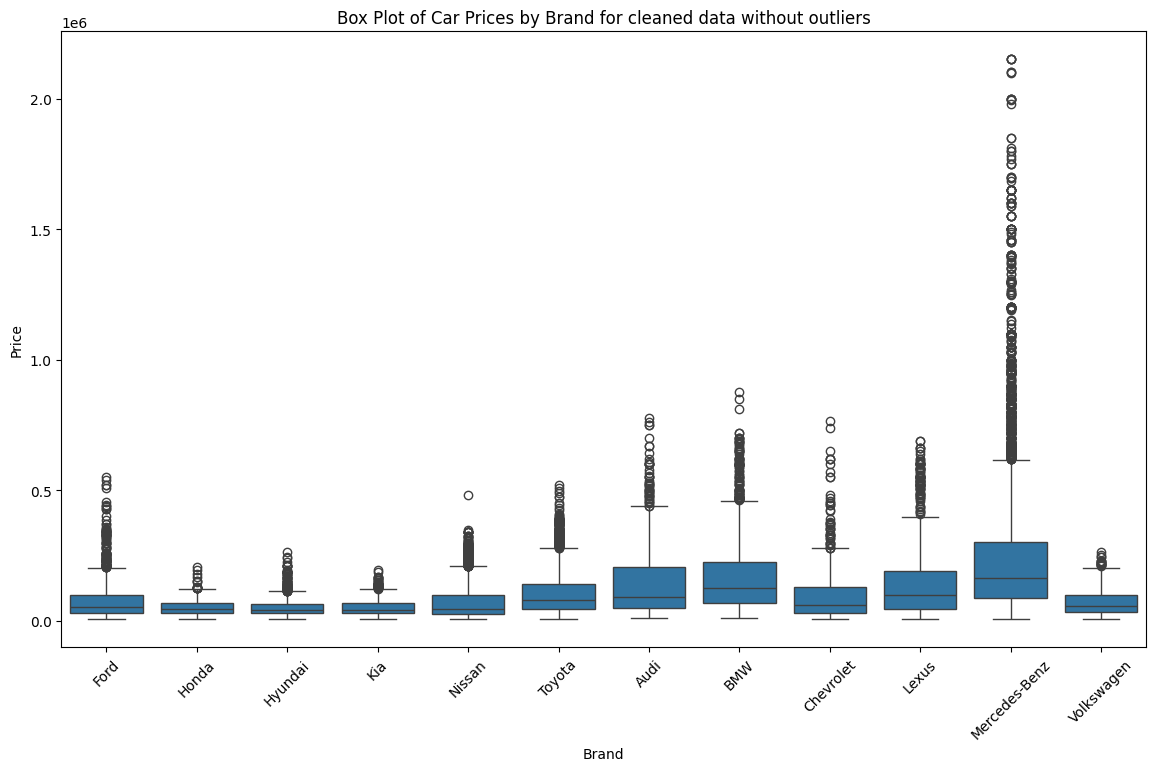

In [19]:
# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='brand', y='price', data=data_cleaned)
plt.title('Box Plot of Car Prices by Brand for cleaned data without outliers')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Prepare features and build the model


In [20]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
unique_counts = data_cleaned[categorical_columns].nunique()
unique_counts

brand               12
model              361
title            18732
steering_side        2
region_specs         8
location           356
tags                 1
dtype: int64

In [21]:
#Prepare data
data_cleaned_ = data_cleaned.drop(columns=['year', 'title', 'location', 'tags'])  # Dropping columns not needed for the model

# Check for NaN values in data again
nan_columns = data_cleaned_.columns[data_cleaned_.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['km', 'steering_side', 'region_specs', 'car_age']


In [22]:
#Review and delete nan
print('Nan in km column')
print(data_cleaned_[data_cleaned_.km.isna()])


Nan in km column
         price    brand     model  km steering_side region_specs  car_age  \
1331   67900.0    Honda      City NaN           NaN          NaN      NaN   
1972   60000.0  Hyundai   Elantra NaN           NaN          NaN      NaN   
3180   41900.0      Kia    Cerato NaN           NaN          NaN      NaN   
6760  129000.0   Toyota  Fortuner NaN           NaN          NaN      NaN   

      warranty  
1331     False  
1972     False  
3180     False  
6760     False  


In [23]:
#Remove nan
data_cleaned_=data_cleaned_[~data_cleaned_.km.isna()]

In [24]:
# Check for NaN values in data again
nan_columns = data_cleaned_.columns[data_cleaned_.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [26]:
#data_final
data_cleaned_


,price,brand,model,km,steering_side,region_specs,car_age,warranty
0,159000.0,Ford,F-Series Pickup,107000.0,Left Hand,GCC Specs,6.0,False
1,276000.0,Ford,Mustang,2000.0,Left Hand,American Specs,3.0,True
2,62500.0,Ford,Edge,79000.0,Left Hand,GCC Specs,8.0,False
3,169000.0,Ford,Mustang,55000.0,Left Hand,GCC Specs,4.0,True
4,209000.0,Ford,Mustang,29000.0,Left Hand,GCC Specs,1.0,True
...,...,...,...,...,...,...,...,...
21117,26000.0,Volkswagen,Passat,107624.0,Left Hand,GCC Specs,10.0,False
21118,110000.0,Volkswagen,Tiguan,0.0,Left Hand,Chinese Specs,1.0,False
21119,79000.0,Volkswagen,Transporter,0.0,Left Hand,GCC Specs,5.0,False
21120,185000.0,Volkswagen,Touareg,54300.0,Left Hand,GCC Specs,3.0,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
data_transformed = pd.get_dummies(data_cleaned_, columns=['brand', 'model', 'steering_side', 'region_specs'])

numerical_cols = [ 'km', 'car_age']
scaler = StandardScaler()
data_transformed[numerical_cols] = scaler.fit_transform(data_transformed[numerical_cols])

# Define features and target
X = data_transformed.drop('price', axis=1)
y = data_transformed['price']

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['uint8', 'bool']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in X_train
nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

# If NaN values are found, fill them
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())
X_test[numerical_columns] = X_test[numerical_columns].fillna(X_test[numerical_columns].median())

# Apply Standard Scaling to numerical columns only
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


# Building an ensemble of models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

# Choose the best model based on MAE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Print the results
print("Results of mean_absolute_error for each model:", results)
print("Best model:", best_model_name)

Columns with NaN values: []
Results of mean_absolute_error for each model: {'RandomForest': 22907.525747290118, 'GradientBoosting': 45120.128523030085, 'AdaBoost': 81110.96050476933}
Best model: RandomForest


### Add hyperparameter tunning to the best model defined

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of the best model: {mae}')

# Identify the most important features
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.7s
[CV] END m

In [34]:
print('Best model is RandomForestRegressor with params ')
grid_search.best_estimator_.get_params()

Best model is RandomForestRegressor with params 


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

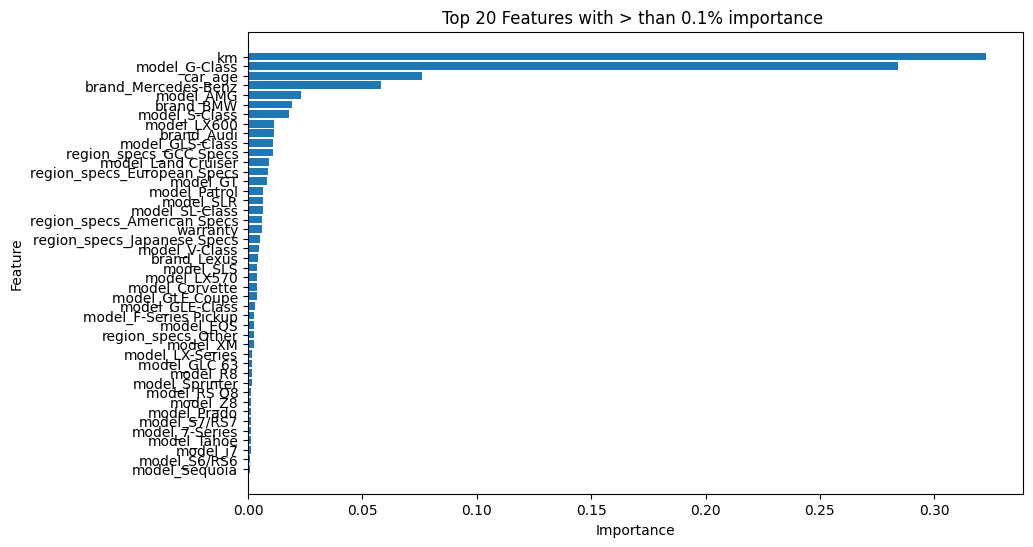

In [30]:
# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.barh(importance_df[importance_df.Importance>0.001]['Feature'], importance_df[importance_df.Importance>0.001]['Importance'])
#plt.title('Top 20 Features Importance ')
plt.title('Top 20 Features with > than 0.1% importance ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

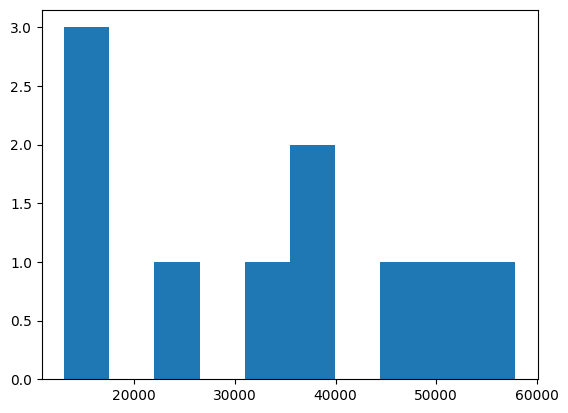

Average MAE through cross validation 33217.937699023096


In [31]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_score=np.abs(cv_score)
plt.hist(cv_score)
plt.show()
print(f"Average MAE through cross validation {np.mean(cv_score)}")

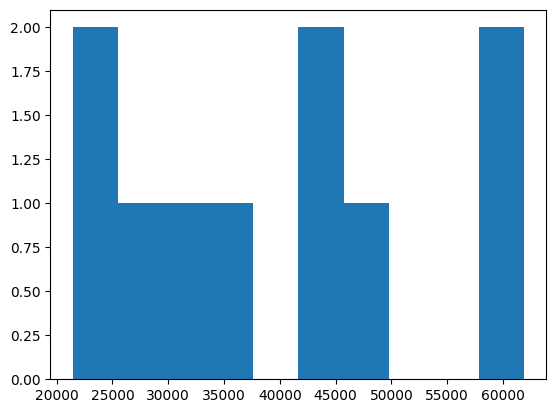

In [32]:
from sklearn.model_selection import cross_val_score
#Testing best model with features that have > 0.01% importance
X_imp=X[importance_df[importance_df.Importance>0.001]['Feature']]
cv_score = cross_val_score(grid_search.best_estimator_, X_imp, y, cv=10, scoring='neg_mean_absolute_error')
cv_score=np.abs(cv_score)
plt.hist(cv_score)
plt.show()

In [33]:
print('Average absolute error after adjustments')
print(np.mean(cv_score))

Average absolute error after adjustments
39958.594399769536


### Let's dig into the records that have high errors in predicted values and:
* a. Remove records with features that have consistently high errors in predicted values from training/testing set 
* b. Transform the values to get more statistically significant sample

In [160]:
#Define the records that are constantly predicted with high error
bad_pred_indexes=set()
for i in range(10):
    # Calculate the number of rows corresponding to 80%
    n_rows = X.shape[0]
    n_80_percent = int(n_rows * 0.8)
    # Select 80% of the indexes
    selected_indexes = np.random.choice(X.index, n_80_percent, replace=False)
    pred_indexes=list(set(X.index)-set(selected_indexes))
    
    X_train, X_test, y_train, y_test=X.loc[selected_indexes], X.loc[pred_indexes], y.loc[selected_indexes], y.loc[pred_indexes]
    
    best_model=grid_search.best_estimator_.fit(X_train, y_train)
    y_hat=best_model.predict(X_test)
    
    prediction=pd.DataFrame({'y_test':y_test.values,'y_hat': y_hat}, index=pred_indexes)
    prediction['mae']=np.abs(prediction['y_hat']-prediction['y_test'])
    prediction=prediction[prediction.mae>50000].sort_values('mae')
    
    bad_pred_indexes.update(set(prediction.index.values))
    

In [161]:
len(prediction)
np.sort(list(bad_pred_indexes))
prediction
#len(pred_indexes)

,y_test,y_hat,mae
15202,1025000.0,9.749489e+05,50051.055556
16316,285000.0,2.349100e+05,50090.000000
16242,90000.0,1.401500e+05,50150.000000
4405,170000.0,2.202749e+05,50274.916667
290,225000.0,1.745713e+05,50428.666667
...,...,...,...
15033,850000.0,1.586130e+05,691387.010000
16184,445000.0,1.181977e+06,736977.003333
20124,1199000.0,4.101617e+05,788838.336667
12309,850000.0,5.795631e+04,792043.693333


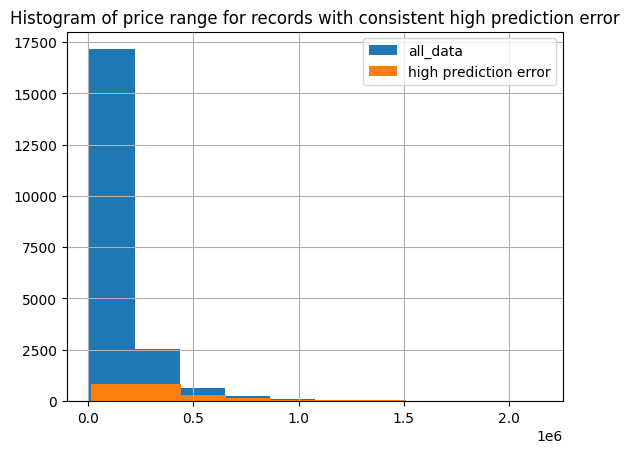

In [178]:
data_cleaned_.loc[list(bad_pred_indexes)].sort_values('price')#['steering_side'].unique()
data_cleaned_.loc[15505]#['steering_side'].unique()
data_cleaned_['price'].hist(label='all_data')
data_cleaned_.loc[list(bad_pred_indexes)]['price'].hist(label='high prediction error')
plt.legend()
plt.title('Histogram of price range for records with consistent high prediction error')
plt.show()

In [166]:
#Define the records with high pred errors
high_error_pred=data_cleaned_.loc[list(bad_pred_indexes)].groupby('brand')['model'].value_counts().reset_index().rename(columns={'count':'high_error'})
all_counts=data_cleaned_.groupby('brand')['model'].value_counts().reset_index()
merged_df=all_counts.merge(high_error_pred).sort_values('high_error')
merged_df['perc_high_error']=merged_df['high_error']/merged_df['count']
merged_df.sort_values('perc_high_error').tail(20)
print('Number of items that correspond to high error and small number of examples for training is')
merged_df[merged_df.perc_high_error>0.5]['count'].sum()
#data_cleaned_.loc[list(bad_pred_indexes)].groupby('brand')['model'].value_counts().sort_values(ascending=False).head(30)

1147

#### a. Remove records with features that have consistently high errors in predicted values from training/testing set

In [187]:
#Let's remove these recorsds
high_err_rec=merged_df[merged_df.perc_high_error>0.5]
remove_records=data_cleaned_.merge(high_err_rec[['brand', 'model']], how='right')
data_cleaned__ = data_cleaned_[~data_cleaned_.isin(remove_records.to_dict(orient='list')).all(axis=1)]
print('Removed records')
print(high_err_rec[['brand', 'model']])

Removed records
             brand         model
88            Ford   Thunderbird
87            Ford         Other
69       Chevrolet           SSR
68       Chevrolet          Nova
157  Mercedes-Benz   240/260/280
158  Mercedes-Benz       450 SEL
159  Mercedes-Benz           EQA
160  Mercedes-Benz     SEC-Class
67       Chevrolet        Apache
24            Audi         Other
25            Audi            Q2
56             BMW            M1
207     Volkswagen      Multivan
91           Honda         S2000
118          Lexus       LM 350h
170         Nissan          400Z
168         Nissan         Other
156  Mercedes-Benz           SLR
86            Ford    Super Duty
197         Toyota       Coaster
22            Audi        S4/RS4
23            Audi           SQ8
206     Volkswagen          Bora
52             BMW            M6
21            Audi     RS e-tron
83            Ford  Shelby Cobra
51             BMW            i3
153  Mercedes-Benz         Other
166         Nissan         

In [176]:
#Performing training again
data_transformed = pd.get_dummies(data_cleaned__, columns=['brand', 'model', 'steering_side', 'region_specs'])
scaler = StandardScaler()
data_transformed[numerical_cols] = scaler.fit_transform(data_transformed[[ 'km', 'car_age']])
# Define features and target
X = data_transformed.drop('price', axis=1)
y = data_transformed['price']

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['uint8', 'bool']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in X_train
nan_columns = X_train.columns[X_train.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

# If NaN values are found, fill them
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())
X_test[numerical_columns] = X_test[numerical_columns].fillna(X_test[numerical_columns].median())

# Apply Standard Scaling to numerical columns only
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


# Building an ensemble of models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

# Choose the best model based on MAE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Print the results
print("Results of mean_absolute_error for each model:", results)
print("Best model:", best_model_name)

Columns with NaN values: []
Results of mean_absolute_error for each model: {'RandomForest': 18017.56656699188, 'GradientBoosting': 34050.44991348616, 'AdaBoost': 128989.9676450265}
Best model: RandomForest


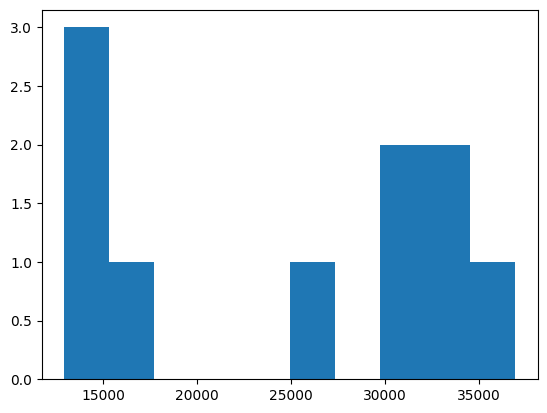

Average MAE through cross validation 24986.66763452103


In [177]:
#Cross validation 
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_score=np.abs(cv_score)
plt.hist(cv_score)
plt.show()
print(f"Average MAE through cross validation {np.mean(cv_score)}")

Now cross validation MAE is significantyly decreased from 39958 to 24986


Option b doesn't work to reduce the error

### Create pipeline for the best model and store it

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define feature columns
# We're choosing to remove no_accident, num_of_pic and steering_side which is why they are not included in the preprocessing steps
categorical_features = ['brand','model','region_specs','location_cleaned']
numerical_features = ['km','age']
binary_features = ['warranty', 'service_hist','luxury']

# Preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=False))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ])

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(learning_rate=0.3, min_child_weight=0.1, reg_alpha=0.1, subsample=0.3))
])
